In [164]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import shapiro

In [28]:
students=pd.read_csv("/Users/sajjad/Downloads/Project 1/students.csv")
students.info()
assignments=pd.read_csv("/Users/sajjad/Downloads/Project 1/assignments.csv")
grades=pd.read_csv("/Users/sajjad/Downloads/Project 1/grades.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   student_id     180 non-null    int64 
 1   student_name   180 non-null    object
 2   student_level  180 non-null    object
 3   major          180 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.8+ KB


In [16]:
students.head(5)

,student_id,student_name,student_level,major
0,288941,Matthew,1-Freshmen,English
1,463818,Austin,4-Senior,English
2,465208,Tyler,3-Junior,Engineering
3,383634,Samantha,3-Junior,Science
4,689448,Brittany,3-Junior,English


In [19]:
students.describe

<bound method NDFrame.describe of      student_id student_name student_level                major
0        288941      Matthew    1-Freshmen              English
1        463818       Austin      4-Senior              English
2        465208        Tyler      3-Junior          Engineering
3        383634     Samantha      3-Junior              Science
4        689448     Brittany      3-Junior              English
..          ...          ...           ...                  ...
175      657590     Jonathan   2-Sophomore          Engineering
176      894088       Robert   2-Sophomore           Philosophy
177      678017       Hannah   2-Sophomore  Statistics and Math
178      778403       Andrew   2-Sophomore              Science
179      861994       Alexis      3-Junior          Engineering

[180 rows x 4 columns]>

In [10]:
df.dtypes

student_id        int64
student_name     object
student_level    object
major            object
dtype: object

In [21]:
assignments.head()

,assignment_id,assignment_category,assignment_value
0,1,Homework,8
1,2,Homework,8
2,3,Homework,12
3,4,Quiz,22
4,5,Homework,8


In [27]:
assignments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   assignment_id        20 non-null     int64 
 1   assignment_category  20 non-null     object
 2   assignment_value     20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [29]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   student_id     3600 non-null   int64
 1   assignment_id  3600 non-null   int64
 2   numeric_grade  3600 non-null   int64
dtypes: int64(3)
memory usage: 84.5 KB


In [30]:
grades.head()

,student_id,assignment_id,numeric_grade
0,288941,1,4
1,288941,2,7
2,288941,3,10
3,288941,4,16
4,288941,5,5


In [34]:
students.duplicated().sum()

0

In [35]:
grades.duplicated().sum()

0

In [36]:
assignments.duplicated().sum()

0

Text(0.5, 1.0, 'Number of Students in Each Level')

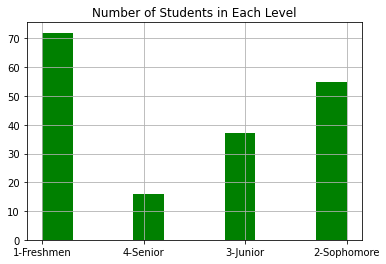

In [46]:
students.student_level.hist(color="green")
plt.title("Number of Students in Each Level")

Text(0.5, 1.0, 'Number of Students in Each Major')

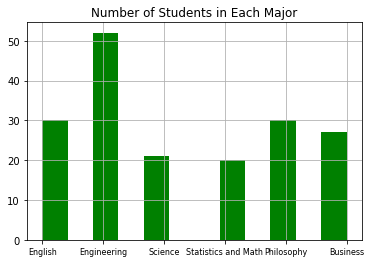

In [61]:
students.major.hist(color="green",bins=12,xlabelsize=8)
plt.title("Number of Students in Each Major")

In [ ]:
students.groupby(['student_level', 'major']).size().reset_index(name='count').sort_values(by="count")

In [92]:
df=pd.merge(students,(pd.merge(grades,assignments,on="assignment_id")),on="student_id")

In [93]:
df

,student_id,student_name,student_level,major,assignment_id,numeric_grade,assignment_category,assignment_value
0,288941,Matthew,1-Freshmen,English,1,4,Homework,8
1,288941,Matthew,1-Freshmen,English,2,7,Homework,8
2,288941,Matthew,1-Freshmen,English,3,10,Homework,12
3,288941,Matthew,1-Freshmen,English,4,16,Quiz,22
4,288941,Matthew,1-Freshmen,English,5,5,Homework,8
...,...,...,...,...,...,...,...,...
3595,861994,Alexis,3-Junior,Engineering,16,6,Homework,8
3596,861994,Alexis,3-Junior,Engineering,17,8,Homework,10
3597,861994,Alexis,3-Junior,Engineering,18,17,Quiz,20
3598,861994,Alexis,3-Junior,Engineering,19,8,Homework,12


In [99]:
df["score_grade"]=df.numeric_grade/df.assignment_value

In [100]:
df

,student_id,student_name,student_level,major,assignment_id,numeric_grade,assignment_category,assignment_value,score_grade
0,288941,Matthew,1-Freshmen,English,1,4,Homework,8,0.500000
1,288941,Matthew,1-Freshmen,English,2,7,Homework,8,0.875000
2,288941,Matthew,1-Freshmen,English,3,10,Homework,12,0.833333
3,288941,Matthew,1-Freshmen,English,4,16,Quiz,22,0.727273
4,288941,Matthew,1-Freshmen,English,5,5,Homework,8,0.625000
...,...,...,...,...,...,...,...,...,...
3595,861994,Alexis,3-Junior,Engineering,16,6,Homework,8,0.750000
3596,861994,Alexis,3-Junior,Engineering,17,8,Homework,10,0.800000
3597,861994,Alexis,3-Junior,Engineering,18,17,Quiz,20,0.850000
3598,861994,Alexis,3-Junior,Engineering,19,8,Homework,12,0.666667


In [118]:
df2=df.groupby("student_level")["score_grade"].mean()

In [119]:
df2

student_level
1-Freshmen     0.710932
2-Sophomore    0.763995
3-Junior       0.771563
4-Senior       0.824910
Name: score_grade, dtype: float64

In [122]:
df3=df2.reset_index()

In [123]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   student_level  4 non-null      object 
 1   score_grade    4 non-null      float64
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


In [125]:
df3

,student_level,score_grade
0,1-Freshmen,0.710932
1,2-Sophomore,0.763995
2,3-Junior,0.771563
3,4-Senior,0.824910


In [166]:
df4=df.groupby("major")["score_grade"].mean().reset_index()

In [167]:
df4

,major,score_grade
0,Business,0.739079
1,Engineering,0.702410
2,English,0.746820
3,Philosophy,0.788164
4,Science,0.780650
5,Statistics and Math,0.801483


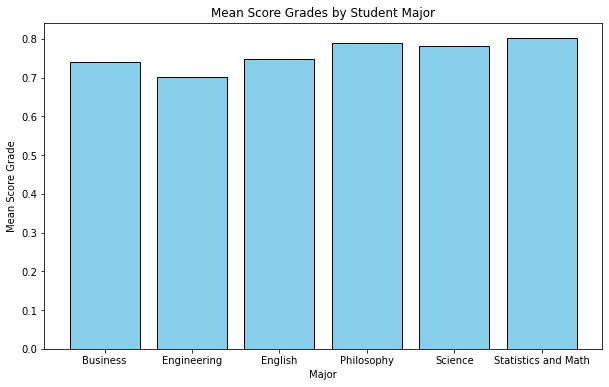

In [168]:
plt.figure(figsize=(10, 6))
plt.bar(df4['major'], df4['score_grade'], color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Mean Score Grades by Student Major')
plt.xlabel('Major')
plt.ylabel('Mean Score Grade')


plt.show()

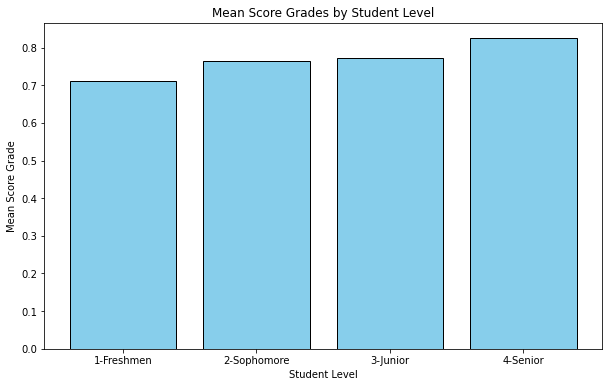

In [138]:
plt.figure(figsize=(10, 6))
plt.bar(df3['student_level'], df3['score_grade'], color='skyblue', edgecolor='black')

# Adding title and labels
plt.title('Mean Score Grades by Student Level')
plt.xlabel('Student Level')
plt.ylabel('Mean Score Grade')


plt.show()

<AxesSubplot:>

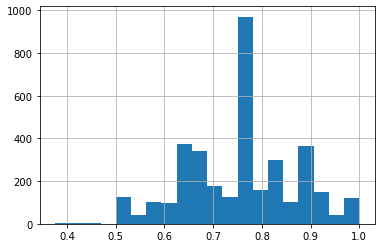

In [150]:
df.score_grade.hist(bins=20)

In [145]:
df.score_grade.describe()

count    3600.000000
mean        0.749740
std         0.114752
min         0.375000
25%         0.666667
50%         0.750000
75%         0.833333
max         1.000000
Name: score_grade, dtype: float64

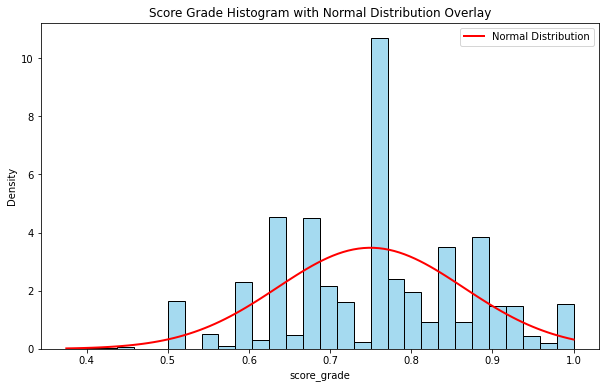

In [155]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df.score_grade, bins=30, kde=False, stat='density', color='skyblue', edgecolor='black')

# Plotting the normal distribution curve
mean = np.mean(df.score_grade)
std = np.std(df.score_grade)
x = np.linspace(min(df.score_grade), max(df.score_grade), 100)
plt.plot(x, norm.pdf(x, mean, std), color='red', lw=2, label='Normal Distribution')

# Adding title and labels
plt.title('Score Grade Histogram with Normal Distribution Overlay')
plt.xlabel('score_grade')
plt.ylabel('Density')

# Show the legend
plt.legend()

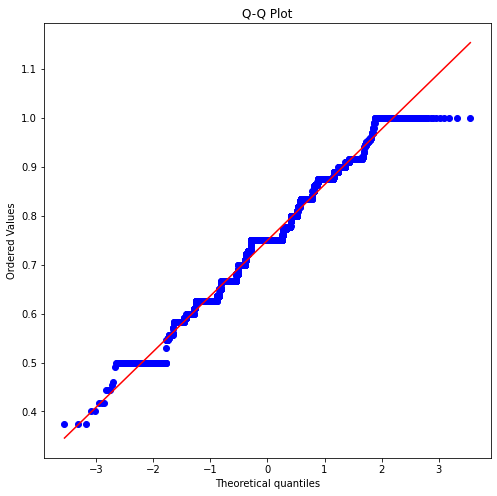

In [163]:
# Creating the Q-Q plot
plt.figure(figsize=(8, 8))
stats.probplot(df.score_grade, dist="norm", plot=plt)

# Adding title
plt.title('Q-Q Plot')

# Show the plot
plt.show()

In [170]:
# Conduct the Shapiro-Wilk test
statistic, p_value = shapiro(data)

# Output the results
print('Shapiro-Wilk Test Statistic:', statistic)
print('p-value:', p_value)

Shapiro-Wilk Test Statistic: 0.9996765851974487
p-value: 0.8657425045967102


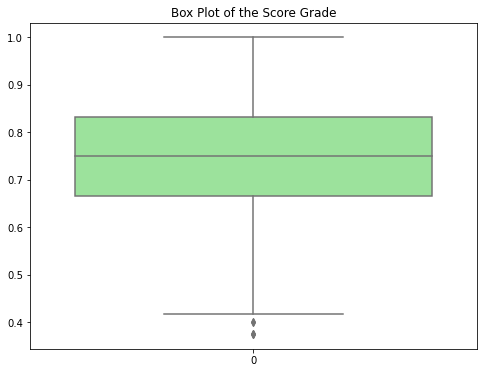

In [148]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df.score_grade, color='lightgreen')

# Adding title
plt.title('Box Plot of the Score Grade')

# Show the plot
plt.show()

In [171]:
# outliers
# Example: Calculate Z-scores for the grades
z_scores = np.abs(stats.zscore(df.score_grade))

# Identify outliers (Z-score > 3)
outliers = df[z_scores > 3]

In [172]:
outliers

,student_id,student_name,student_level,major,assignment_id,numeric_grade,assignment_category,assignment_value,score_grade
152,514068,Nicholas,1-Freshmen,Business,13,3,Homework,8,0.375
348,188048,Nicole,1-Freshmen,Engineering,9,4,Homework,10,0.400
1544,996584,Eric,3-Junior,Engineering,5,3,Homework,8,0.375
1976,709559,Stephanie,1-Freshmen,Engineering,17,4,Homework,10,0.400
3100,969187,Tyler,1-Freshmen,Engineering,1,3,Homework,8,0.375
